In [29]:
import numpy as np
from data_loader import Data
from configure import Configure

In [30]:
data = Data(0.1)

In [31]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = data.load_data(0.1)

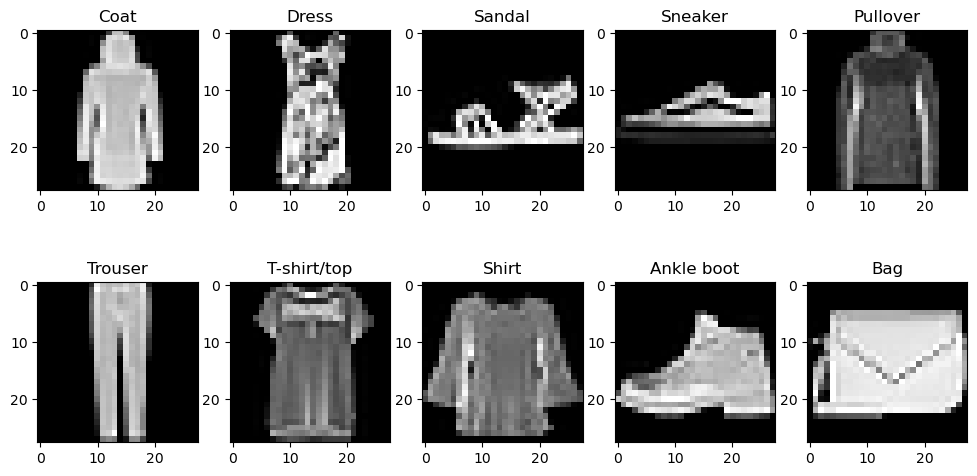

In [32]:
data.display_collage((12,6))

In [33]:
X_train.shape

(6000, 28, 28)

In [34]:
configuration = Configure()
# configuration.show_blueprint()
configuration_script = {
      'hidden_layers':[784,784,256],
      'input_size':28**2, 
      'output_size':10,
      'activation_functions':['sigmoid', 'sigmoid', 'sigmoid'],
      'optimizer':'vanilla',
      'loss_function':'cross entropy'
}
nn, optim, loss_fn = configuration.configure(configuration_script)

In [35]:
nn.view_model_summary()

Model Summary
---------------------------------------
hidden0
weights : (784, 784)
bias : (784, 1)
activation : sigmoid
---------------------------------------
hidden1
weights : (784, 784)
bias : (784, 1)
activation : sigmoid
---------------------------------------
hidden2
weights : (256, 784)
bias : (256, 1)
activation : sigmoid
---------------------------------------
output3
weights : (10, 256)
bias : (10, 1)
activation : softmax
---------------------------------------
Total Number of Parameters : 1434410


In [36]:
for block in nn.params.keys():
      for layer in nn.params[block].keys():
            if layer != 'h':
                  print(nn.params[block][layer].shape)

(784, 784)
(784, 1)
(784, 784)
(784, 1)
(256, 784)
(256, 1)
(10, 256)
(10, 1)


In [46]:
#initialize loss
loss = loss_fn(nn)
#initialize optimizer
op = optim(nn.params, 1e-3)

for epoch in range(1000):
      idx = np.random.randint(11, len(X_train))
      x = X_train[idx-11:idx].reshape(11, -1).T
      y = y_train[idx-11:idx]
      
      # print(x.shape, y.shape)
      nn.params, nn.logits = nn.forward(x)

      
      #compute loss
      if epoch % 50 == 0:
            print(round(loss.compute(nn.infer(x), y), 3))

      print((np.equal(np.argmax(nn.logits,axis = 0), y)))
      break



      #backpropagate loss
      grads = loss.backpropagate()

      #update the params
      updated_params = op.update(grads)

      #pass the updated params to neural net
      nn.set_params(updated_params)

2.299


ValueError: operands could not be broadcast together with shapes (10,) (11,) 

In [ ]:
np.argmax(nn.infer(X_train[10].reshape(28**2, 1)))

4

In [ ]:
y_train[10]

0

In [ ]:
np.min(x)

0